In [112]:

    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns

In [113]:
class ScratchLogisticRegression():
    
    def __init__(self, num_iter=100, lr=0.01, bias=False,C=1, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lamda = 1/C
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _check_for_bias(self,X):
        if self.bias == True:
            x1 = np.ones(X.shape[0])
        else:
            x1 = np.zeros(X.shape[0])
        
        return np.concatenate([x1.reshape(-1,1),X],axis=1)
        
        
    def _sigmoid_function(self,X):
        linear_model = np.dot(X,self.W)
        
        return 1/(1+np.exp(-linear_model))
    
    def _gradient_descent(self, X, error):
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.W -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.W)/len(X)
        
    def _loss_function(self, y, y_pred):
        return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.W[1:]**2)
        
    def fit(self, X, y, X_val=False, y_val=False):
        
        self.ylabel = np.unique(y)
        
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        X = self._check_for_bias(X)
        
        self.W = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            y_pred = self._sigmoid_function(X)
            error = y_pred - y            
            self.loss[i] = self._loss_function(y,y_pred)
            
            if (type(X_val) != bool):
                val_X = self._check_for_bias(X_val)
                val_ypred = self._sigmoid_function(val_X)
                
                self.val_loss[i] = self._loss_function(y_val,val_ypred)
            
            self._gradient_descent(X, error)
            
            if self.verbose:
                print('n_iter:', i,
                      'loss:',self.loss[i]) 
        np.save('theta', self.W)
        
    def predict(self, X):
        X = self._check_for_bias(X)
        y_pred = self._sigmoid_function(X)
        return np.where(y_pred<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        X = self._check_for_bias(X)
        self._sigmoid_function(X)
        return self._sigmoid_function(X)










In [114]:
x1 = np.arange(1,11,1).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)
print('x:\n',x)

x:
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


In [115]:
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [1.15909665 0.59404165]


In [116]:
z = np.dot(x,theta)
print('z:\n',z)

z:
 [1.75313831 2.34717996 2.94122162 3.53526327 4.12930493 4.72334658
 5.31738824 5.91142989 6.50547155 7.0995132 ]


In [117]:
y = 1/(1+np.exp(-z))
print('y:\n',y)

y:
 [0.8523482  0.91270981 0.94984695 0.97167463 0.98416085 0.99119286
 0.9951184  0.997299   0.998507   0.99917517]


In [118]:
z1 = np.arange(-50,50,0.1)
y1 = 1/(1+np.exp(-z1))

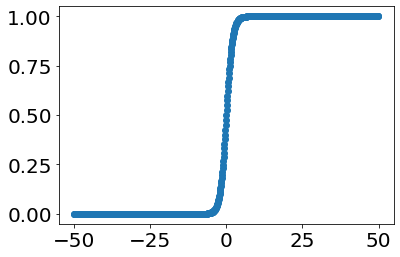

In [119]:
plt.scatter(z1,y1)
plt.plot();

In [120]:
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

y = np.array([0.4,0.5,0.2,0.1,0.9])
yhat = np.where(y<0.5,0,1)
y_test = np.array([1,1,0,0,1])
print('x:\n',x)
print('y:\n',y)
print('yhat:\n',yhat)
print('ytest:\n',y_test)

x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]
y:
 [0.4 0.5 0.2 0.1 0.9]
yhat:
 [0 1 0 0 1]
ytest:
 [1 1 0 0 1]


In [121]:
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [ 1.05451693 -0.05835013]


In [122]:
error = yhat - y_test
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [123]:
lm = np.array([0,1])
theta*lm

array([ 0.        , -0.05835013])

In [124]:
0.01*np.dot(error,x)/len(x) + theta*lm/len(x)

array([-0.002     , -0.01567003])

In [125]:
theta -= (0.01*np.dot(error,x)/len(x) + theta*lm/len(x))
print('theta:\n',theta)

theta:
 [ 1.05651693 -0.04268011]


In [126]:
theta -= (0.01*np.dot(error,x)/len(x) + theta*lm/len(x))
theta

array([ 1.05851693, -0.03014408])

In [127]:
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x2 = np.array([2,1,5,2,4]).reshape(-1,1)
y = np.array([1,0,0,0,1])
print('x1:\n',x1)
print('x1:\n',x2)
print('y:\n',y)

x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x1:
 [[2]
 [1]
 [5]
 [2]
 [4]]
y:
 [1 0 0 0 1]


In [128]:
clf = ScratchLogisticRegression()
clf.fit(x1,y,x1,y)

y_proba = clf.predict_proba(x2)
y_pred = clf.predict(x2)

 

In [129]:
print('y_proba:\n',y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.43359728 0.46665094 0.33895088 0.43359728 0.36949628]
y_pred:
 [0 0 0 0 0]


In [130]:
y1 = np.ones(99)
y2 = np.zeros(99)
yh = np.arange(0.01,1.0,0.01)


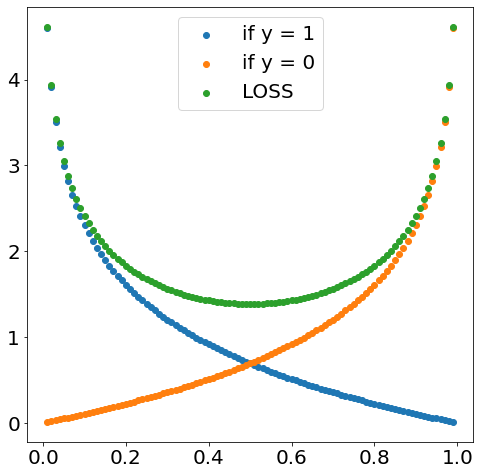

In [131]:
J1 = -y1*np.log(yh)-(1-y1)*np.log(1-yh)
J2 = -y2*np.log(yh)-(1-y2)*np.log(1-yh)
J = -y1*np.log(yh)-(1-y2)*np.log(1-yh)

fig,ax = plt.subplots(figsize=(8,8))

plt.rcParams["font.size"] = 20
plt.scatter(yh,J1,label='if y = 1')
plt.scatter(yh,J2,label='if y = 0')
plt.scatter(yh,J,label='LOSS')
plt.legend();

In [132]:
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target.reshape(-1,1)

In [133]:
import pandas as pd

iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris.shape

(150, 5)

In [134]:
disp = False
if disp == True:
    sna.parplot(iris,palette='tab10');

In [135]:
iris_x =  iris.loc[iris[4]!=0,2:3].values
iris_y =  iris.loc[iris[4]!=0,4].values
print('iris_x.shape:',iris_x.shape)
print('iris_y.shape:',iris_y.shape)

iris_x.shape: (100, 2)
iris_y.shape: (100,)


In [136]:
from sklearn.model_selection  import train_test_split
x = iris_x
y = iris_y

x_train, x_valid, y_train, y_valid =\
train_test_split(x,y,train_size=0.8,random_state=0)

print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_valid.shape:',x_valid.shape)
print('y_valid.shape:',y_valid.shape)


x_train.shape: (80, 2)
y_train.shape: (80,)
x_valid.shape: (20, 2)
y_valid.shape: (20,)


In [137]:
np.unique(y)

array([1., 2.])

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_valid_std = scaler.transform(x_valid)

In [139]:
clf = ScratchLogisticRegression(num_iter=500, lr=0.01, C=0.01, verbose=False)
clf.fit(x_train_std,y_train,x_valid_std,y_valid)



y_pred  = clf.predict(x_valid_std)
y_prob = clf.predict_proba(x_valid_std)


In [140]:
y_valid

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1.])

In [141]:
y_pred

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [142]:
y_prob

array([0.4572835 , 0.65171443, 0.478553  , 0.67653776, 0.59790289,
       0.65797074, 0.45042244, 0.5213983 , 0.63849115, 0.61213567,
       0.57043138, 0.54967787, 0.61185054, 0.45027383, 0.30488465,
       0.34851387, 0.478553  , 0.40857732, 0.50697032, 0.4292266 ])

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy',accuracy)
print('prcision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.95
prcision 1.0
recall 0.9
f1 0.9473684210526316


In [144]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(x_train_std,y_train)

y_pred2  = clf2.predict(x_valid_std)
y_prob2 = clf2.predict_proba(x_valid_std)[:,1]


In [145]:
y_pred2

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [146]:
y_prob2

array([0.23262094, 0.99566933, 0.38251422, 0.99870075, 0.97650782,
       0.99684024, 0.18094291, 0.70926963, 0.99356414, 0.98110349,
       0.936804  , 0.86579625, 0.98315914, 0.18979525, 0.00101915,
       0.00581198, 0.38251422, 0.05024309, 0.62094489, 0.10284353])

In [147]:
accuracy = accuracy_score(y_valid, y_pred2)
precision = precision_score(y_valid, y_pred2)
recall = recall_score(y_valid, y_pred2)
f1 = f1_score(y_valid, y_pred2)

print('accuracy',accuracy)
print('prcision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.95
prcision 1.0
recall 0.9
f1 0.9473684210526316


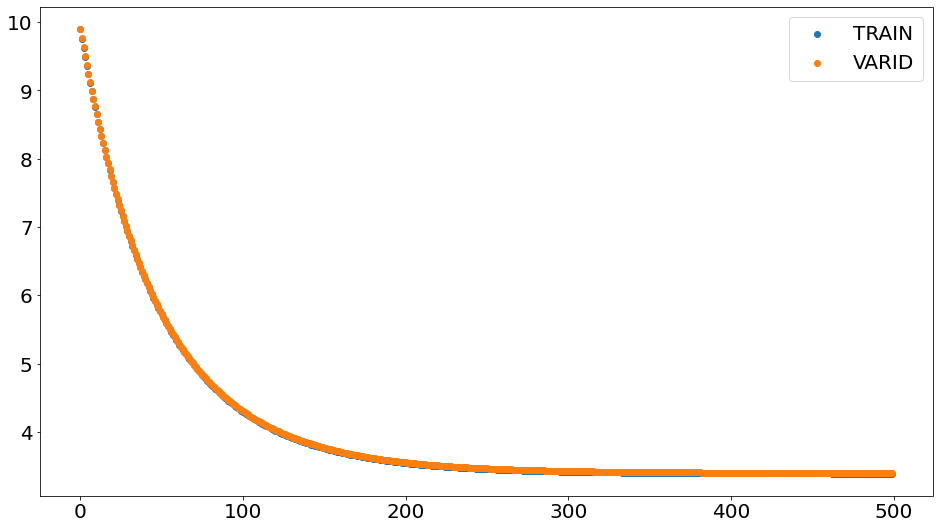

In [148]:
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(clf.loss)),clf.loss,label='TRAIN')
plt.scatter(range(len(clf.loss)),clf.val_loss,label='VARID')
plt.legend();

In [149]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()









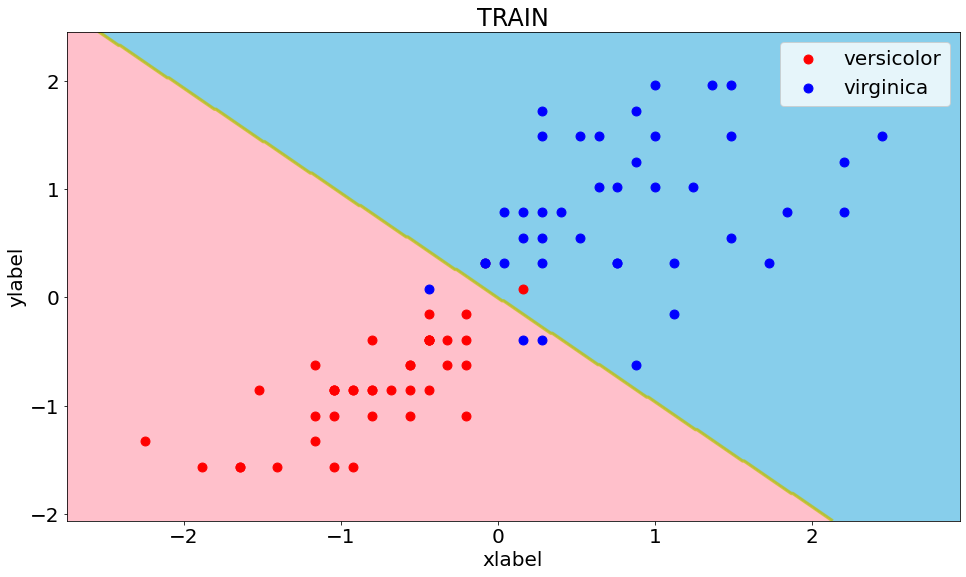

In [150]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(x_train_std,y_train,clf,title='TRAIN');

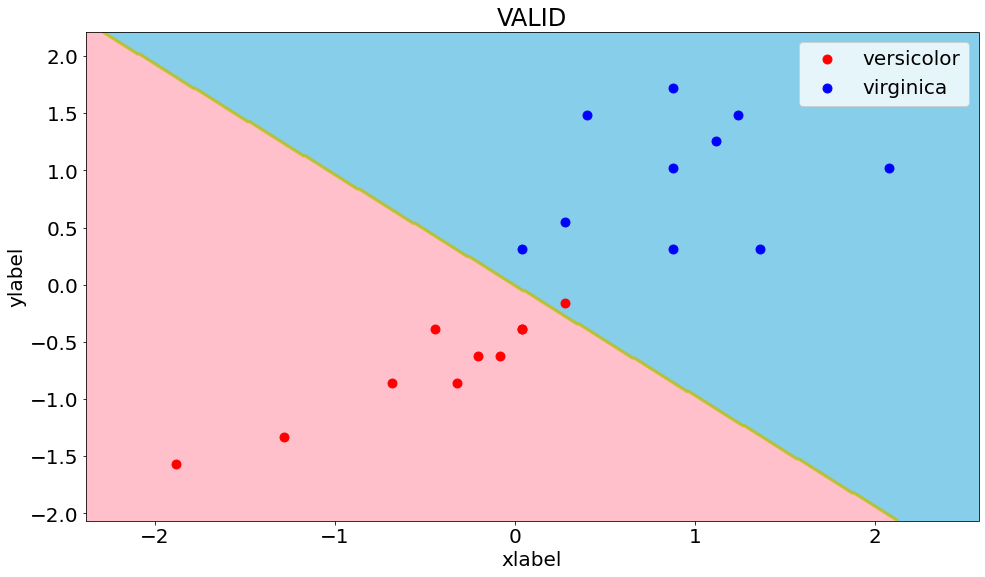

In [151]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(x_valid_std,y_valid,clf,title='VALID');

In [152]:
#problem 8
np.load('theta.npy')

array([0.77496155, 0.23537636, 0.24334927])